In [2]:
# imports
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [3]:
def parse_file(file_name: str) -> dict[str, list[dict[str, str]]]:
  """
  Parses a file containing metrics and returns a dictionary of strategies with their corresponding metrics.

  Args:
    file_name (str): The name of the file to parse.

  Returns:
    dict[str, list[dict[str, str]]]: A dictionary where the keys are strategy names and the values are lists of metrics.
  """
  strats = {}
  cur_strat = ''
  entries = 0

  with open(file_name, 'r') as file:
    for line in file.readlines():
      if line.startswith('['):
        cur_strat = line.strip().strip('[]').lower()
        strats[cur_strat] = []
        entries = 0

      else:
        if entries >= 100000:
          continue
        metric = line_to_dict(line)
        strats[cur_strat].append(metric)
        entries += 1

  return strats

def line_to_dict(line):
  """
  Converts a line of comma-separated key-value pairs into a dictionary.

  Args:
    line (str): The line containing comma-separated key-value pairs.

  Returns:
    dict: A dictionary where the keys are the lowercase keys from the line and the values are the corresponding values.
  """
  metric = {}
  for kv in line.split(', '):
    k, v = kv.split(': ')
    metric[k.lower()] = v
  return metric

In [4]:
def load_data(file_name):
  """
  Load data from a file or parse the file if it doesn't exist.

  Args:
    file_name (str): The name of the file to load or parse.

  Returns:
    data: The loaded or parsed data.
  """
  try:
    with open(file_name + '.pkl', 'rb') as file:
      data = pickle.load(file)
  except:
    data = parse_file(file_name)
    with open(file_name + '.pkl', 'wb') as file:
      pickle.dump(data, file)
  return data

In [5]:
# load data
file_name = 'millionGames.txt'
strats = load_data(file_name)

# print sample data
print('Loaded data from', file_name)
print('Strategies:', [strat for strat in strats])
print('Records per strategy:', [len(strats[strat]) for strat in strats])

# sample records
for strat in strats:
  print(f'\n{strat}:')
  for metric in strats[strat][:3]:
    print(metric)

Loaded data from millionGames.txt
Strategies: ['bincode', 'huffman', 'dynamic huffman', 'opening huffman']
Records per strategy: [100000, 100000, 100000, 100000]

bincode:
{'time to compress (seconds)': '0.001128072', 'time to decompress (seconds)': '0.000041585', 'compressed size (bits)': '2248', 'decompressed size (bits)': '4000', 'bits per move': '38.101694915254235', 'bits per move excluding headers': '28.88135593220339\n'}
{'time to compress (seconds)': '0.000284501', 'time to decompress (seconds)': '0.000029957', 'compressed size (bits)': '1568', 'decompressed size (bits)': '2632', 'bits per move': '43.55555555555556', 'bits per move excluding headers': '31.77777777777778\n'}
{'time to compress (seconds)': '0.000412651', 'time to decompress (seconds)': '0.000053737', 'compressed size (bits)': '2912', 'decompressed size (bits)': '5688', 'bits per move': '30.652631578947368', 'bits per move excluding headers': '25.68421052631579\n'}

huffman:
{'time to compress (seconds)': '0.01212

In [6]:
IGNORE_BINCODE = False

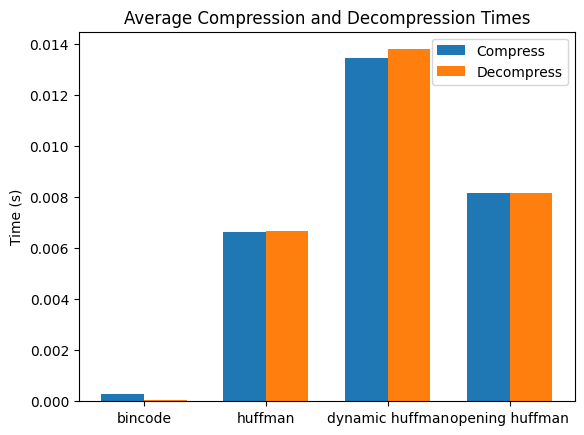

In [7]:
def plot_time_bar():
  times = {}
  for key in strats:
    if IGNORE_BINCODE and key == 'bincode':
      continue

    compress_times = [float(metric['time to compress (seconds)']) for metric in strats[key]]
    decompress_times = [float(metric['time to decompress (seconds)']) for metric in strats[key]]
    times[key] = (compress_times, decompress_times)
  
  # plot the compression and decompression times next to each other
  fig, ax = plt.subplots()
  x = np.arange(len(times))
  width = 0.35
  ax.bar(x - width/2, [np.mean(times[key][0]) for key in times], width, label='Compress')
  ax.bar(x + width/2, [np.mean(times[key][1]) for key in times], width, label='Decompress')
  
  ax.set_ylabel('Time (s)')
  ax.set_title('Average Compression and Decompression Times')
  ax.set_xticks(x)
  ax.set_xticklabels(times.keys())
  ax.legend()

  plt.show()
  
plot_time_bar()

Average compress times:
bincode 0.00030104844791999997
huffman 0.006624395112390001
dynamic huffman 0.013468501592120001
opening huffman 0.00816015239604

Average decompress times:
bincode 4.356303395e-05
huffman 0.0066551153703
dynamic huffman 0.013791664104669999
opening huffman 0.008161043311810001


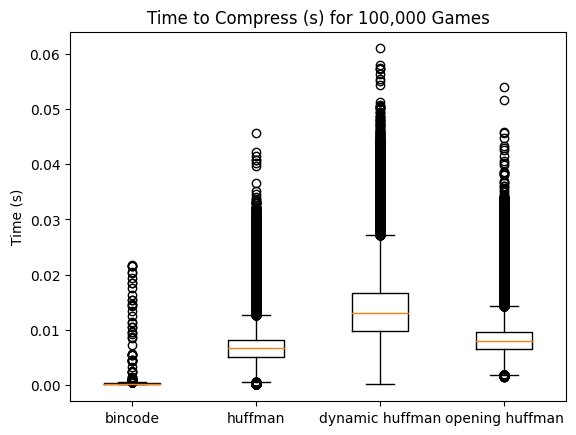

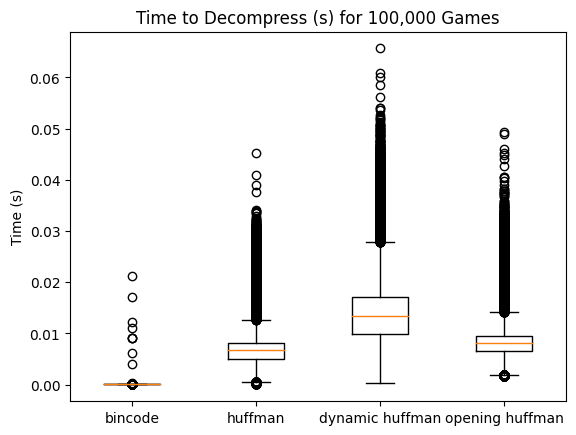

In [70]:
def plot_time_box():
  times = {}
  for key in strats:
    if IGNORE_BINCODE and key == 'bincode':
      continue

    compress_times = [float(metric['time to compress (seconds)']) for metric in strats[key]]
    decompress_times = [float(metric['time to decompress (seconds)']) for metric in strats[key]]
    times[key] = (compress_times, decompress_times)

  # print the average compress and decompress times
  print('Average compress times:')
  for key in times:
    print(key, np.mean(times[key][0]))
  print('\nAverage decompress times:')
  for key in times:
    print(key, np.mean(times[key][1]))

  # plot compress and decompress times on separate box charts
  fig, ax = plt.subplots()
  ax.boxplot([times[key][0] for key in times])
  ax.set_xticklabels(times.keys())
  plt.title('Time to Compress (s) for 100,000 Games')
  ax.set_ylabel('Time (s)')
  plt.show()

  fig, ax = plt.subplots()
  ax.boxplot([times[key][1] for key in times])
  ax.set_xticklabels(times.keys())
  plt.title('Time to Decompress (s) for 100,000 Games')
  ax.set_ylabel('Time (s)')
  plt.show()
plot_time_box()

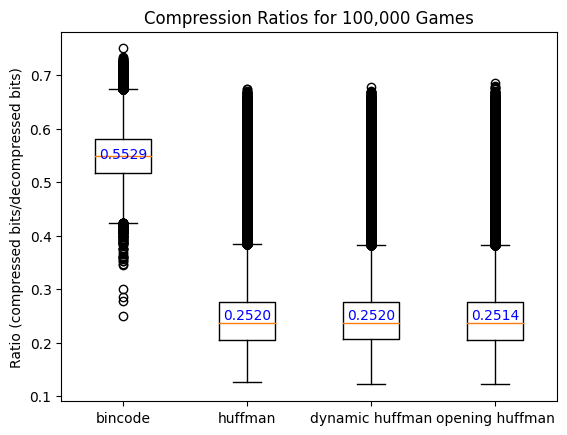

In [51]:
def plot_compression_efficiency_box():
    ratios = {}
    for key in strats:
        if IGNORE_BINCODE and key == 'bincode':
            continue

        compress_ratios = [float(metric['compressed size (bits)']) / float(metric['decompressed size (bits)']) for metric in strats[key]]
        ratios[key] = compress_ratios
    
    fig, ax = plt.subplots()
    ax.boxplot([ratios[key] for key in ratios])
    ax.set_xticklabels(ratios.keys())
    plt.title('Compression Ratios for 100,000 Games')
    ax.set_ylabel('Ratio (compressed bits/decompressed bits)')
    for key in ratios:
        ax.text(list(ratios.keys()).index(key) + 1, np.mean(ratios[key]), f'{np.mean(ratios[key]):.4f}', ha='center', va='center', color='blue') 
    plt.show()
plot_compression_efficiency_box()

Average Bits Per Move
bincode: 41.05370 (including headers), 29.18603 (excluding headers)
huffman: 20.54619 (including headers), 4.46361 (excluding headers)
dynamic huffman: 20.45438 (including headers), 4.46250 (excluding headers)
opening huffman: 20.57289 (including headers), 4.42008 (excluding headers)


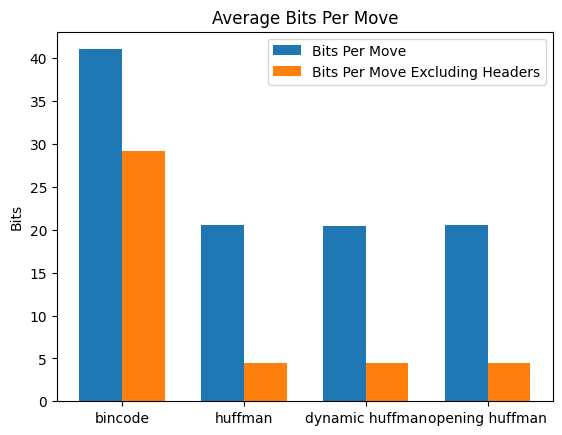

In [71]:
def plot_bpm_bar():
  bpm = {}
  for key in strats:
    if IGNORE_BINCODE and key == 'bincode':
      continue

    bpmwh = [float(metric['bits per move']) for metric in strats[key]]
    bpmeh = [float(metric['bits per move excluding headers']) for metric in strats[key]]
    bpm[key] = (bpmwh, bpmeh)

  # print average bits per move
  print('Average Bits Per Move')
  for key in bpm:
    print(f'{key}: {np.mean(bpm[key][0]):.5f} (including headers), {np.mean(bpm[key][1]):.5f} (excluding headers)')

  
  # plot the compression and decompression times next to each other
  fig, ax = plt.subplots()
  x = np.arange(len(bpm))
  width = 0.35
  ax.bar(x - width/2, [np.mean(bpm[key][0]) for key in bpm], width, label='Bits Per Move')
  ax.bar(x + width/2, [np.mean(bpm[key][1]) for key in bpm], width, label='Bits Per Move Excluding Headers')
  
  ax.set_ylabel('Bits')
  ax.set_title('Average Bits Per Move')
  ax.set_xticks(x)
  ax.set_xticklabels(bpm.keys())
  ax.legend()

  plt.show()
  
plot_bpm_bar()

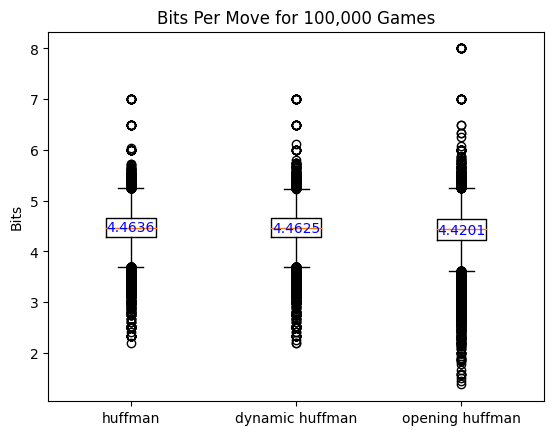

In [59]:
def plot_bpm_box():
  bpm = {}
  for key in strats:
    if IGNORE_BINCODE and key == 'bincode':
      continue

    bpmwh = [float(metric['bits per move']) for metric in strats[key]]
    bpmeh = [float(metric['bits per move excluding headers']) for metric in strats[key]]
    bpm[key] = (bpmwh, bpmeh)

  # plot compress and decompress times on separate box charts
  # fig, ax = plt.subplots()
  # ax.boxplot([bpm[key][0] for key in bpm])
  # ax.set_xticklabels(bpm.keys())
  # plt.title('Bits Per Move')

  # # add the mean to the chart
  # for key in bpm:
  #   ax.text(list(bpm.keys()).index(key) + 1, np.mean(bpm[key][0]), f'{np.mean(bpm[key][0]):.4f}', ha='center', va='center', color='blue')

  # plt.show()

  fig, ax = plt.subplots()
  ax.boxplot([bpm[key][1] for key in bpm])
  ax.set_xticklabels(bpm.keys())
  plt.title('Bits Per Move for 100,000 Games')
  ax.set_ylabel('Bits')

  # add the mean to the chart
  for key in bpm:
    ax.text(list(bpm.keys()).index(key) + 1, np.mean(bpm[key][1]), f'{np.mean(bpm[key][1]):.4f}', ha='center', va='center', color='blue')

  plt.show()

IGNORE_BINCODE = True
plot_bpm_box()

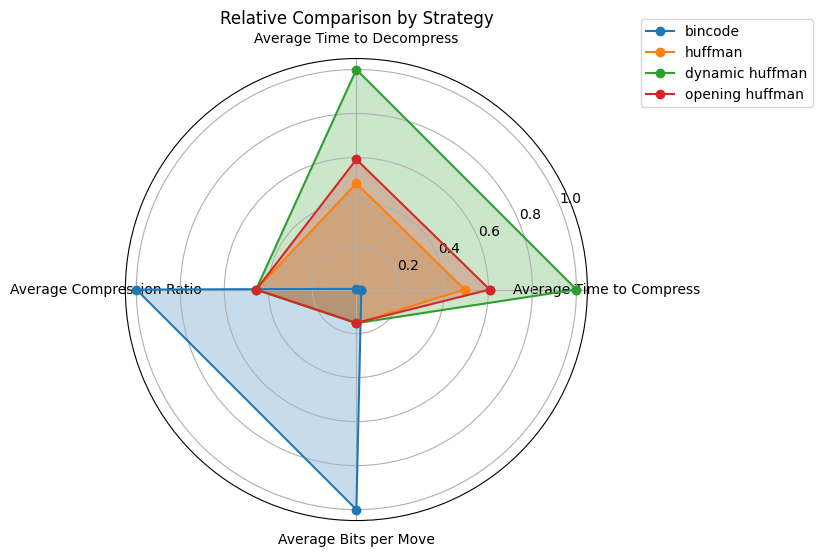

In [68]:
def plot_efficiency_overhead():
    if 'IGNORE_BINCODE' in globals() and IGNORE_BINCODE:
        local_strats = {key: strats[key] for key in strats if key != 'bincode'}
    else:
        local_strats = strats

    labels = ['Average Time to Compress', 'Average Time to Decompress', 'Average Compression Ratio', 'Average Bits per Move'] 
    stats = {}
    for strategy, records in local_strats.items():
        times_to_compress = [float(record['time to compress (seconds)']) for record in records]
        times_to_decompress = [float(record['time to decompress (seconds)']) for record in records]
        compression_ratios = [float(record['compressed size (bits)']) / float(record['decompressed size (bits)']) for record in records]
        # bits_per_move = [float(record['bits per move']) for record in records]
        bits_per_move_ex_headers = [float(record['bits per move excluding headers']) for record in records]
        
        avg_stats = [
            np.mean(times_to_compress),
            np.mean(times_to_decompress),
            np.mean(compression_ratios),
            # np.mean(bits_per_move),
            np.mean(bits_per_move_ex_headers)
        ]
        stats[strategy] = avg_stats

    # normalize the stats
    max_stats = [max([stats[strategy][i] for strategy in stats]) for i in range(len(labels))]
    for strategy, stat in stats.items():
        for i in range(len(stat)):
            stat[i] /= max_stats[i]


    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))
    for strategy, stat in stats.items():
        stat = stat + stat[:1]  # Ensure the stat list is circular
        ax.plot(angles, stat, '-o', label=strategy)
        ax.fill(angles, stat, alpha=0.25)

    ax.set_thetagrids(np.degrees(angles[:-1]), labels)
    ax.set_title('Relative Comparison by Strategy')
    ax.legend(loc='upper left', bbox_to_anchor=(1.1, 1.1))

    plt.show()

IGNORE_BINCODE = False
plot_efficiency_overhead()